# CS5102 - DIP Assignment 3

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 
 

## Part1 - Gaussian Noise

### Theory

$$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $$ <br>
$\Large f(x) = Probability Density Function $ <br>
$\Large \sigma = Standard Deviation $ <br>
$\Large \mu = Mean $

The standard Gaussian distribution has standard normal distribution, with zero mean and unit variance. (source: Wikipedia)

### Gaussian Distribution

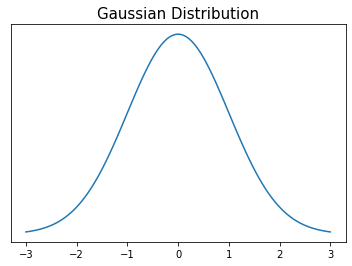

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.yticks([])
plt.title("Gaussian Distribution",fontsize=15)
plt.show()

### Importing Libraries


In [2]:
#importing necessary libraries
import glob
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading Input Grayscale Image

In [7]:
#Reading input image
path=r'lena.png'
image=cv2.imread(path,0)
image=np.array(image)
print('Original Image Shape -', image.shape)

Original Image Shape - ()


### Adding Gaussian Noise

In [8]:
plt.rcParams["figure.figsize"]=15,15
n=19 #initial kernel size
images=[]
for i in range(1,11):
    noised=cv2.GaussianBlur(image,(n,n),0)
    plt.subplot(5,5,i)
    plt.imshow(noised,cmap='gray')
    images.append(noised)
    n=n+2;
plt.show()

TypeError: ignored

### Calculating Average 

##### Method 1 - Built In Function 

In [ ]:
##Method1
plt.rcParams["figure.figsize"]=5,5
avg_image=images[0]
for i in range(1,len(images)):
    alpha=1.0/(i+1)
    beta=1.0-alpha
    avg_image=cv2.addWeighted(images[i],alpha,avg_image,beta,0.0)
plt.imshow(avg_image,cmap='gray')
plt.title("Avg Image - Method1", fontsize=15)
plt.show()
avg_image
method1_image=avg_image

##### Method 2 - User Defined Function 

In [ ]:
##Method2
test=[]
for i in range(0,10):
    img=np.array(images[i])
    img=img/10
    #img=img.astype(int)
    test.append(img)
img=img*0
#print(img, img.shape)
for i in range(0,10):
    img=img+test[i]
img=img.astype(int)
method2_image=img
#img=np.rint(img)
#img=img.astype(int)
plt.imshow(img,cmap='gray')
plt.title("Avg Image - Method2", fontsize=15)
plt.show()

In [ ]:
#Calculating rmse score for each image w.r.t reference image
rmse=math.sqrt(np.square(np.subtract(method1_image,method2_image)).mean())
print("Root Mean Square Error of Method 1 and 2 = ",rmse)

### Observation

When images are averaged out then the image obtained is just the collection of averaged out individual pixel values of each image.

In [ ]:
plt.rcParams["figure.figsize"]=18,18
for i in range(0,10):
    plt.subplot(4,3,i+1)
    plt.hist((images[i]).ravel(),256,[0,256])
    plt.title("NoiseImage"+str(i+1),fontsize=15)
plt.subplot(4,3,i+2)
plt.title("AvgImage - Method1",fontsize=15)
plt.hist(method1_image.ravel(),256,[0,256]);
plt.subplot(4,3,i+3)
plt.title("AvgImage - Method2",fontsize=15)
plt.hist(method2_image.ravel(),256,[0,256]);
plt.show()

## Part2 - Interpolation

A method of constructing new data points within the range of a discrete set of known data points. (source: Wikipedia)

### Reading Input Grayscale Image

In [ ]:
#Reading input image
path=r'lena.png'
image=cv2.imread(path)
image=np.array(image)
print('Original Image Shape -', image.shape)
row,col,ch=image.shape

### Resizing: OpenCV Built-In Function

In [ ]:
def resize(scale_factors,image,method):
    row,col,ch=image.shape
    scale_factors.sort()
    n=len(scale_factors)
    fig, ax = plt.subplots(1,n, sharex=True, sharey=True)
    for i in scale_factors:
        n=n-1
        resized=cv2.resize(image,(int(i*row),int(i*col)),method)
        #print(resized.shape)
        ax[n].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
        #plt.title(resized.shape)
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"]=16,16
scale_factors=[0.5,1,2]
print("Interpolation: Nearest Neighbour")
print('Scale: 2x, 1x, 0.5x')
resize(scale_factors,image,cv2.INTER_NEAREST)
print("Interpolation: Bilinear")
print('Scale: 2x, 1x, 0.5x')
resize(scale_factors,image,cv2.INTER_LINEAR)

### Resizing: User Defined Function Color, Nearest Neighbour

In [ ]:
plt.rcParams["figure.figsize"]=15,15
def interNearestCustom(image):
    plt.rcParams["figure.figsize"]=8,8
    #print(gray_image[4])
    #print(image.shape)
    row1,col1,ch1=image.shape
    scale_factor=2
    n=row1
    n=int(n*scale_factor)

    #Initiallizing a zero, scaled matrix of original image
    scaled_image=np.zeros((n,n,3),np.uint8)
    row2,col2,ch2=scaled_image.shape

    # Iterating over the original image
    image_nums=[]
    x=0
    y=0
    for x in range(0,row1):
        for y in range(0,col1):
            image_nums.append(image[x][y])

    # scaling Nearest Neighbour Interpolation
    x=0
    i=0
    j=0
    while(i<row2):
        j=0
        while(j<col2):
            #print(i,j)
            scaled_image[i][j]=image_nums[x]
            x=x+1
            j=j+scale_factor
        i=i+scale_factor
    #print(scaled_image[4])
    #print(scaled_image.shape)
    for i in range(0,row2):
        for j in range(0,col2):
            temp=scaled_image[i][j]
            comparison = temp == [0,0,0]
            if(comparison.all()):
                temp_i=i//scale_factor
                temp_j=j//scale_factor
                scaled_image[i][j]=image[temp_i][temp_j]
    #print(scaled_image[4])
    #print(scaled_image.shape)    
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title("Original "+str(image.shape), fontsize=15)
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(scaled_image,cv2.COLOR_BGR2RGB))
    plt.title("Scaled_image "+str(scaled_image.shape), fontsize=15)
    plt.show()

In [ ]:
#User Defined nearest neighbour
interNearestCustom(image)

## References:
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html 

https://leslietj.github.io/2020/06/28/How-to-Average-Images-Using-OpenCV/#

https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

https://automaticaddison.com/how-to-blend-multiple-images-using-opencv/

https://stackoverflow.com/questions/17291455/how-to-get-an-average-picture-from-100-pictures-using-pil

https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html

https://www.geeksforgeeks.org/how-to-round-elements-of-the-numpy-array-to-the-nearest-integer/

https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot

https://appdividend.com/2020/09/23/how-to-scale-images-in-python-using-opencv/

https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size

https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

https://www.pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize/

https://www.cambridgeincolour.com/tutorials/image-interpolation.htm

__You have reached the END of this Jupyter Notebook__